In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare data

In [2]:
df = pd.read_csv('fraudTrain.csv')
df_cleaned = df.copy()

df_cleaned

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
# Check null value
df_cleaned.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
# Check duplicated
df_cleaned.duplicated().sum()

np.int64(0)

In [6]:
# Drop irrelevant column
df_cleaned.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'trans_num'], inplace=True)

In [7]:
#Convert data type 
df_cleaned['trans_date_trans_time'] = pd.to_datetime(df_cleaned['trans_date_trans_time'])
df_cleaned['dob'] = pd.to_datetime(df_cleaned['dob'])
df_cleaned['unix_time'] = pd.to_datetime(df_cleaned['unix_time'], unit='s')

In [8]:
# Extract column 'trans_date_trans_time' 

df_cleaned['day'] = df_cleaned['trans_date_trans_time'].dt.day_name()
df_cleaned['month'] = df_cleaned['trans_date_trans_time'].dt.month_name()
df_cleaned['year'] = df_cleaned['trans_date_trans_time'].dt.year
df_cleaned['hour'] = df_cleaned['trans_date_trans_time'].dt.hour

In [9]:
# Add age column
df_cleaned['year_dob'] = df_cleaned['dob'].dt.year
df_cleaned['age'] = df_cleaned['year'] - df_cleaned['year_dob']

In [10]:
# Check unique value column 'is_fraud'
df_cleaned['is_fraud'].unique()

array([0, 1])

In [11]:
count_fraud = (df_cleaned['is_fraud'] == 1).sum()
count_trx = len(df_cleaned)
percentage_fraud = (count_fraud / count_trx) * 100

print(f"Total Transaction: {count_trx}")
print(f"Fraud Transaction: {count_fraud}")
print(f"Percentage Fraud Transaction: {percentage_fraud:.2f}%")


Total Transaction: 1296675
Fraud Transaction: 7506
Percentage Fraud Transaction: 0.58%


In [12]:
total_loss_amount = df_cleaned[df_cleaned['is_fraud'] == 1]['amt'].sum()

print(f"Loss Amount by Fraud : ${total_loss_amount:,.2f}")

Loss Amount by Fraud : $3,988,088.61


In [13]:
df_cleaned.describe()

,trans_date_trans_time,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,hour,year_dob,age
count,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,2019-10-03 12:47:28.070214144,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1973-10-03 19:02:55.017178512,2012-10-03 05:53:56.726123008,3.853734e+01,-9.022646e+01,5.788652e-03,2.019287e+03,1.280486e+01,1.973257e+03,4.602930e+01
min,2019-01-01 00:00:18,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,2012-01-01 00:00:18,1.902779e+01,-1.666712e+02,0.000000e+00,2.019000e+03,0.000000e+00,1.924000e+03,1.400000e+01
25%,2019-06-03 19:12:22.500000,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,2012-06-03 19:12:22.500000,3.473357e+01,-9.689728e+01,0.000000e+00,2.019000e+03,7.000000e+00,1.962000e+03,3.300000e+01
50%,2019-10-03 07:35:47,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1975-11-30 00:00:00,2012-10-03 07:35:47,3.936568e+01,-8.743839e+01,0.000000e+00,2.019000e+03,1.400000e+01,1.975000e+03,4.400000e+01
75%,2020-01-28 15:02:55.500000,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-22 00:00:00,2013-01-28 15:02:55.500000,4.195716e+01,-8.023680e+01,0.000000e+00,2.020000e+03,1.900000e+01,1.987000e+03,5.700000e+01
max,2020-06-21 12:13:37,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,2013-06-21 12:13:37,6.751027e+01,-6.695090e+01,1.000000e+00,2.020000e+03,2.300000e+01,2.005000e+03,9.600000e+01
std,NaN,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,NaN,NaN,5.109788e+00,1.377109e+01,7.586269e-02,4.522452e-01,6.817824e+00,1.737848e+01,1.738237e+01


In [14]:
df_cleaned.describe(include=object)

,merchant,category,gender,city,state,job,day,month
count,1296675,1296675,1296675,1296675,1296675,1296675,1296675,1296675
unique,693,14,2,894,51,494,7,12
top,fraud_Kilback LLC,gas_transport,F,Birmingham,TX,Film/video editor,Monday,May
freq,4403,131659,709863,5617,94876,9779,254282,146875


# EDA

### Finding correlation (numeric_only) with target variable

In [15]:
cor = df_cleaned.corr(numeric_only=True)
cor['is_fraud']

amt           0.219404
zip          -0.002162
lat           0.001894
long          0.001721
city_pop      0.002136
merch_lat     0.001741
merch_long    0.001721
is_fraud      1.000000
year          0.003004
hour          0.013799
year_dob     -0.012378
age           0.012453
Name: is_fraud, dtype: float64

## Financial Fraud Impact Analysis

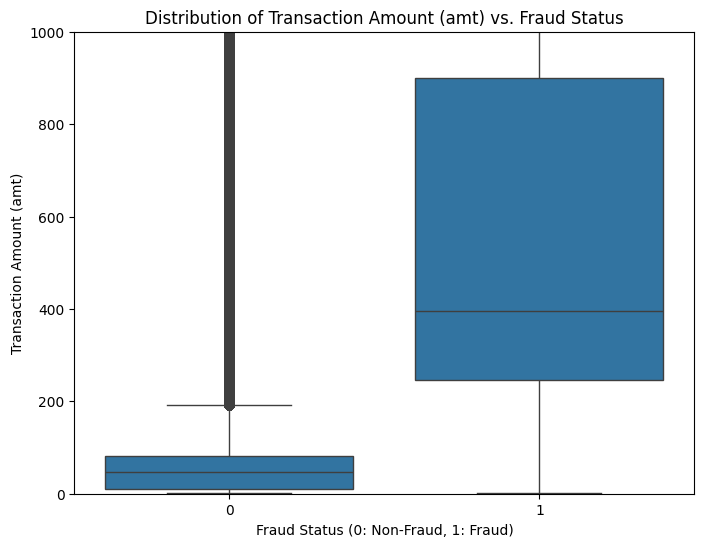

In [16]:
# Box Plot to compare the distribution of transaction amount (amt) between fraud (1) and non-fraud (0)
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=df_cleaned)
plt.title('Distribution of Transaction Amount (amt) vs. Fraud Status')
plt.xlabel('Fraud Status (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount (amt)')
plt.ylim(0, 1000) # Limit the Y-axis to clearly show the box plot 

plt.show()

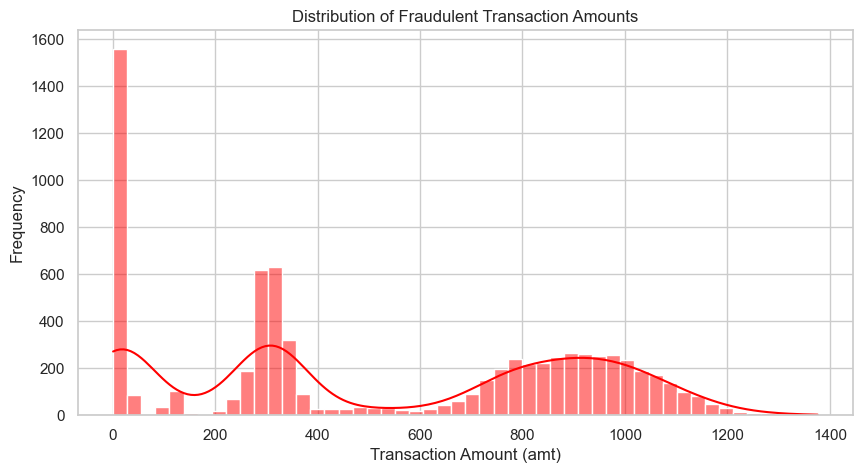

In [17]:
# Histogram to view the distribution of fraudulent transaction amounts
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned[df_cleaned['is_fraud'] == 1]['amt'], bins=50, kde=True, color='red')
plt.title('Distribution of Fraudulent Transaction Amounts')
plt.xlabel('Transaction Amount (amt)')
plt.ylabel('Frequency')

plt.show()

### Rasio Fraud by gender

C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\4033838678.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


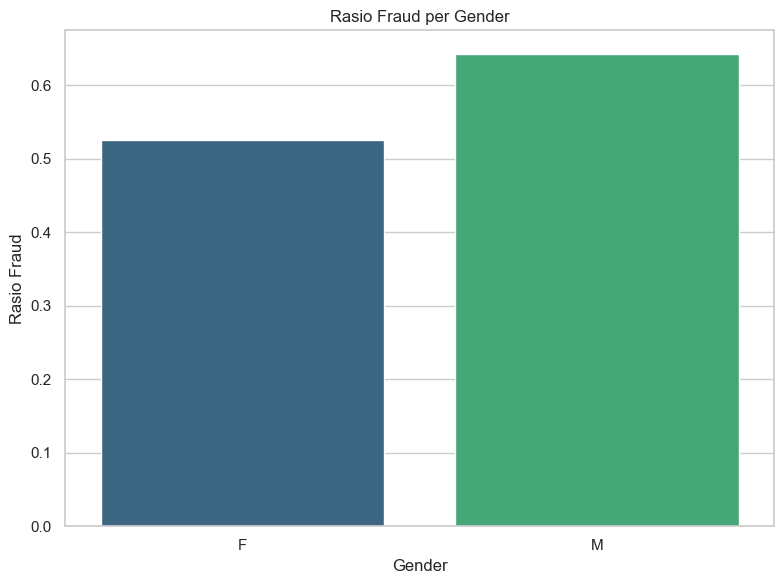

In [18]:
fraud_by_gender = df_cleaned.groupby('gender')['is_fraud'].mean().multiply(100).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(
    x='gender',
    y='is_fraud',
    data=fraud_by_gender,
    palette='viridis'
)

# Set label grafik
plt.title('Rasio Fraud per Gender')
plt.xlabel('Gender')
plt.ylabel('Rasio Fraud')

plt.tight_layout()
plt.show()


### Distribusi Fraud by Gender

In [19]:
# Group gender by column is_fraud
summary_gender = df_cleaned.groupby('gender')['is_fraud'].value_counts().unstack(fill_value=0)

print(summary_gender)

is_fraud       0     1
gender                
F         706128  3735
M         583041  3771


In [20]:
# Define fraud transaction
fraud_trx = df_cleaned[df_cleaned['is_fraud']==1]

# Group gender by amt
fraud_by_gender = fraud_trx.groupby('gender')['amt'].sum()

total_loss_amount_gender = fraud_by_gender.sum()

print(f"Total loss fraud by gender : ${total_loss_amount_gender:,.2f}")

print("Loss amount by gender : ")
for gender, amt in fraud_by_gender.items():
    print(f"{gender}: ${amt:,.2f}")

Total loss fraud by gender : $3,988,088.61
Loss amount by gender : 
F: $1,845,287.34
M: $2,142,801.27


### Ratio Fraud by Top 10 Category

C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\2667340569.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


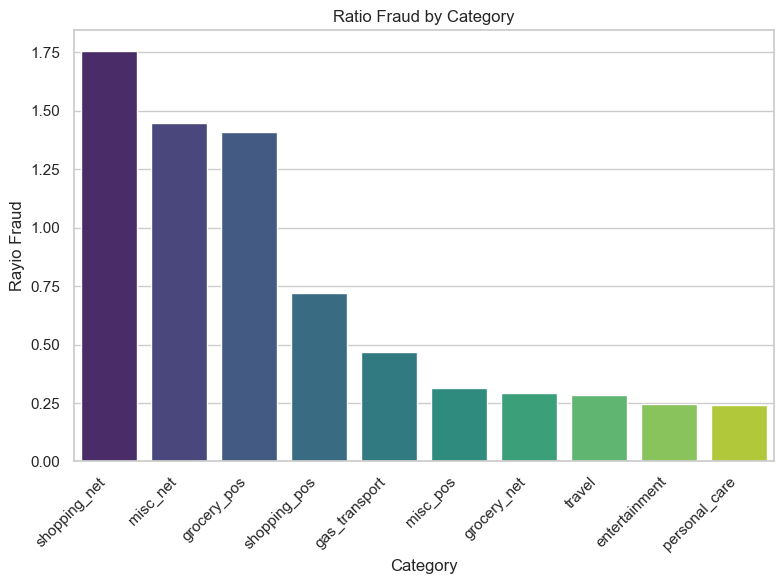

In [21]:
top_10_category = df_cleaned.groupby('category')['is_fraud'].mean().multiply(100).sort_values(ascending=False).head(10).reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(
    x='category',
    y='is_fraud',
    data=top_10_category,
    palette='viridis'
)

# Set label grafik
plt.title('Ratio Fraud by Category')
plt.xlabel('Category')
plt.ylabel('Rayio Fraud')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Distribusi Fraud by Category

In [22]:
# Group category by column is_fraud
summary_category = df_cleaned.groupby('category')['is_fraud'].value_counts().unstack(fill_value=0)

print(summary_category.sort_values(by=1, ascending=False))

is_fraud             0     1
category                    
grocery_pos     121895  1743
shopping_net     95830  1713
misc_net         62372   915
shopping_pos    115829   843
gas_transport   131041   618
misc_pos         79405   250
kids_pets       112796   239
entertainment    93781   233
personal_care    90538   220
home            122917   198
food_dining      91310   151
grocery_net      45318   134
health_fitness   85746   133
travel           40391   116


In [23]:
# Group category by amt
fraud_by_category = fraud_trx.groupby('category')['amt'].sum()

total_loss_amount_category = fraud_by_category.sum()

print(f"Total loss amount fraud by category : ${total_loss_amount_category:,.2f}")

print("Loss amount by category : ")
for category, amt in fraud_by_category.sort_values(ascending=False).items():
   print(f"{category}: ${amt:,.2f}")

Total loss amount fraud by category : $3,988,088.61
Loss amount by category : 
shopping_net: $1,711,723.71
shopping_pos: $739,245.09
misc_net: $729,266.76
grocery_pos: $543,797.90
entertainment: $117,323.79
misc_pos: $54,571.02
home: $50,971.66
food_dining: $18,131.62
gas_transport: $7,594.11
personal_care: $5,757.52
kids_pets: $4,331.08
health_fitness: $2,693.04
grocery_net: $1,629.82
travel: $1,051.49


### Ratio fraud by City

C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\3268541550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<function matplotlib.pyplot.show(close=None, block=None)>

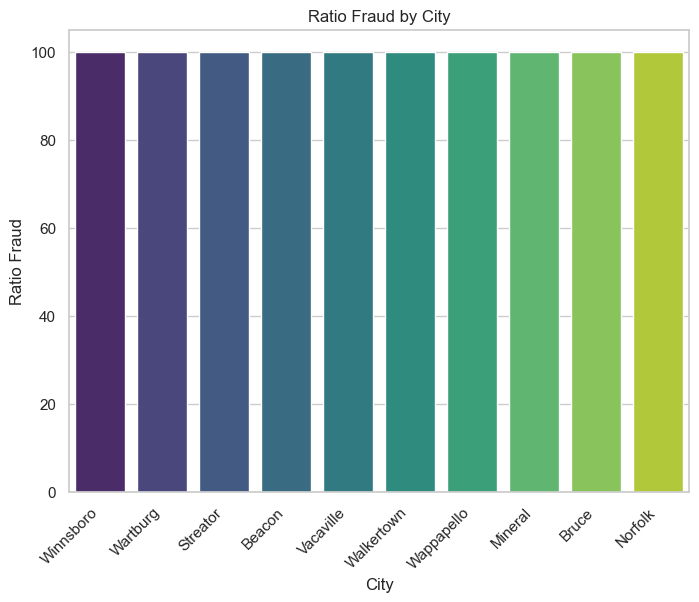

In [24]:
top_10_city = df_cleaned.groupby('city')['is_fraud'].mean().multiply(100).sort_values(ascending=False).head(10).reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.barplot(
    x='city',
    y='is_fraud',
    data=top_10_city,
    palette='viridis'
)

plt.title('Ratio Fraud by City')
plt.xlabel('City')
plt.ylabel('Ratio Fraud')
plt.xticks(rotation=45, ha='right')

plt.show

### Distribution fraud by city

In [25]:
# Group city by column is_fraud
summary_city = df_cleaned.groupby('city')['is_fraud'].value_counts().unstack(fill_value=0)

print(summary_city.sort_values(by=1, ascending=False))

is_fraud        0   1
city                 
Houston      4129  39
Warren       4566  33
Huntsville   3531  29
Naples       4126  29
Topeka       3001  27
...           ...  ..
Bay Minette  1560   0
Annapolis     525   0
Belgrade     2043   0
Zavalla      1537   0
Malad City    503   0

[894 rows x 2 columns]


In [26]:
# Group gender by amt
fraud_by_city = fraud_trx.groupby('city')['amt'].sum()

total_loss_amount_city = fraud_by_city.sum()

print(f"Total loss amount by city : ${total_loss_amount_city:,.2f}")

print("Top 10 Loss amount by city :")
for city, amt in fraud_by_city.sort_values(ascending=False).head(10).items():
    print(f"{city}: ${amt:,.2f}")

Total loss amount by city : $3,988,088.61
Top 10 Loss amount by city :
Houston: $21,667.21
Dallas: $19,747.14
Warren: $18,221.79
Tulsa: $17,470.25
Naples: $17,220.43
Huntsville: $15,142.79
Randolph: $14,773.45
San Antonio: $14,536.75
Lakeland: $13,211.61
New York City: $13,136.86


### Ratio Fraud by State

C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\3942154306.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


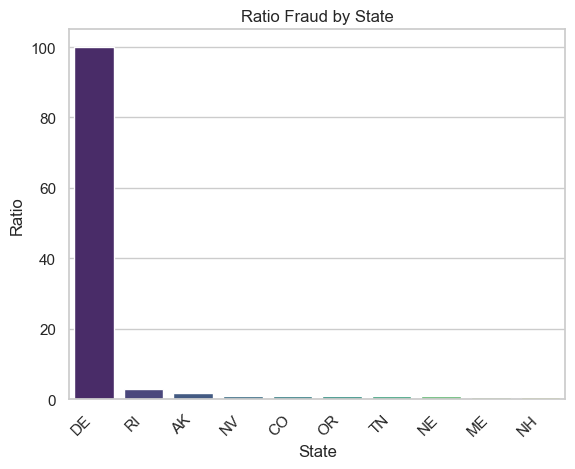

In [27]:
top_10_state = df_cleaned.groupby('state')['is_fraud'].mean().multiply(100).sort_values(ascending=False).head(10).reset_index()

sns.set_style('whitegrid')
plt.Figure(figsize=(8, 6))
sns.barplot(
    x='state',
    y='is_fraud',
    data=top_10_state,
    palette='viridis'
)

plt.title('Ratio Fraud by State')
plt.xlabel('State')
plt.ylabel('Ratio')
plt.xticks(rotation=45, ha='right')

plt.show()

### Distribution fraud by state

In [28]:
# Group state by column is_fraud
summary_state = df_cleaned.groupby('state')['is_fraud'].value_counts().unstack(fill_value=0)

print(summary_state.sort_values(by=1, ascending=False))

is_fraud      0    1
state               
NY        82946  555
TX        94397  479
PA        79389  458
CA        56034  326
OH        46159  321
FL        42390  281
IL        43004  248
MI        45916  238
AL        40774  215
MN        31507  207
VA        29052  198
SC        28997  193
MO        38212  191
NE        23988  180
WI        29205  163
AR        30966  161
MD        26036  157
KS        22840  156
KY        28320  155
NC        30117  149
OR        18448  149
WV        25545  146
GA        25917  146
OK        26528  143
IA        26843  142
IN        27438  142
TN        17414  140
ME        16386  119
NJ        24485  118
MS        21073  115
CO        13767  113
WY        19212  110
WA        18828   96
LA        20874   91
NM        16325   82
SD        12250   74
VT        11696   72
MA        12307   69
UT        10638   61
NH         8219   59
ND        14729   57
NV         5560   47
AZ        10733   37
AK         2084   36
MT        11722   32
DC         35

In [29]:
# Group fraud state by amt
fraud_by_state = fraud_trx.groupby('state')['amt'].sum()

total_loss_state = fraud_by_state.sum()

print(f"Total loss amount by state : ${total_loss_state :,.2f}")

print("Top 10 Loss amount by state : ")
for state, amt in fraud_by_state.sort_values(ascending=False).head(10).items():
    print(f"{state} : ${amt:,.2f}")

Total loss amount by state : $3,988,088.61
Top 10 Loss amount by state : 
NY : $295,548.64
TX : $265,806.41
PA : $244,624.67
CA : $170,943.92
OH : $168,919.98
FL : $150,913.03
IL : $128,441.99
MI : $121,012.08
AL : $112,596.99
MN : $112,454.39


### Ratio Fraud by Job

C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\1132466834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


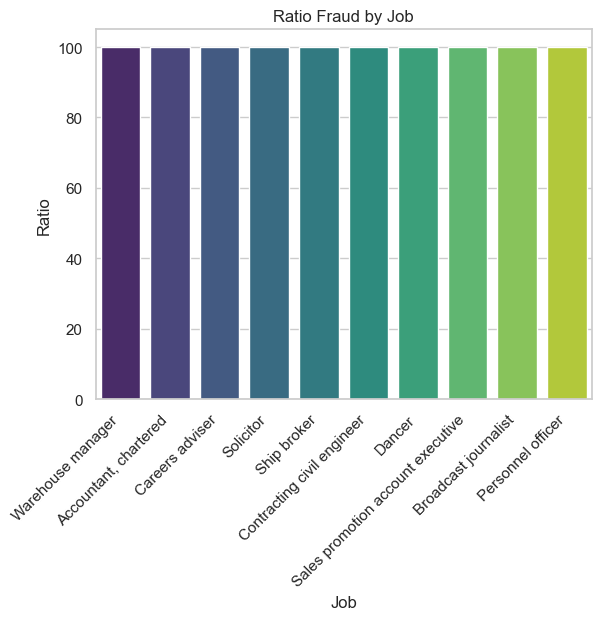

In [30]:
top_10_job = df_cleaned.groupby('job')['is_fraud'].mean().multiply(100).sort_values(ascending=False).head(10).reset_index()

sns.set_style('whitegrid')
plt.Figure(figsize=(8, 6))
sns.barplot(
    x='job',
    y='is_fraud',
    data=top_10_job,
    palette='viridis'
)
plt.title('Ratio Fraud by Job')
plt.xlabel('Job')
plt.ylabel('Ratio')
plt.xticks(rotation=45, ha='right')

plt.show()

### Distibution Fraud by Job 

In [31]:
# Def category jobs
job_categories = {
    'Health & Medical': [
        'Psychologist, counselling', 'Dance movement psychotherapist', 'Pathologist',
        'Radiographer, diagnostic', 'Therapist, occupational', 'Physiotherapist',
        'Forensic psychologist', 'Optician, dispensing', 'Psychologist, forensic',
        'Clinical biochemist', 'Paediatric nurse', 'Child psychotherapist',
        'Paramedic', 'Educational psychologist', 'Audiological scientist',
        'Scientist, audiological', 'Exercise physiologist', 'Surgeon',
        'Therapist, horticultural', 'Health visitor', 'Medical secretary',
        'Diagnostic radiographer', 'Therapist, sports', 'Medical physicist',
        'Chiropodist', 'Counselling psychologist', 'Psychiatric nurse',
        'Embryologist, clinical', 'Immunologist', 'Health physicist',
        'Occupational psychologist', 'Doctor, hospital', 'Phytotherapist',
        'Pharmacologist', 'Horticultural therapist', 'Toxicologist',
        'Podiatrist', 'Mental health nurse', "Nurse, children's",
        'Physiological scientist', 'Health and safety adviser', 'Community pharmacist',
        'Clinical research associate', 'Art therapist', 'Optometrist',
        'Psychotherapist', 'Pharmacist, community', 'Music therapist',
        'Acupuncturist', 'Hospital doctor', 'Biochemist, clinical',
        'General practice doctor', 'Occupational hygienist',
        'Doctor, general practice', 'Occupational therapist', 'Neurosurgeon',
        'Therapist, drama', 'Orthoptist', 'Therapist, music', 'Aid worker',
        'Scientist, biomedical', 'Dispensing optician', 'Environmental health practitioner',
        'Learning disability nurse', 'Nurse, mental health', 'Pharmacist, hospital',
        'Health promotion specialist', 'Psychiatrist', 'Radiographer, therapeutic',
        'Herbalist', 'Osteopath', 'Hospital pharmacist', 'Nutritional therapist',
        'Psychologist, clinical', 'Research scientist (medical)', 'Oncologist',
        'Veterinary surgeon', 'Clinical cytogeneticist', 'Homeopath', 'Cytogeneticist',
        'Ambulance person', 'Medical technical officer', 'Sport and exercise psychologist',
        'Counsellor', 'Psychotherapist, child', 'Learning disability nurse',
        'Clinical psychologist', 'Scientist, clinical (histocompatibility and im...)', 'Biomedical scientist',
        'Scientist, research (medical)', 'Therapist, art'
    ],
    'Technology & IT': [
        'Systems developer', 'IT trainer', 'Systems analyst', 'Network engineer',
        'Applications developer', 'Programmer, multimedia', 'Multimedia programmer',
        'Database administrator', 'Telecommunications researcher', 'Sales professional, IT',
        'IT consultant', 'Web designer', 'Information systems manager',
        'Manufacturing systems engineer', 'Communications engineer', 'Data scientist'
    ],
    'Engineering & Technical': [
        'Engineer, land', 'Naval architect', 'Energy engineer', 'Engineer, mining',
        'Electrical engineer', 'Engineer, technical sales', 'Engineer, electronics',
        'Water engineer', 'Engineer, broadcasting (operations)', 'Engineer, biomedical',
        'Mining engineer', 'Engineer, communications', 'Materials engineer',
        'Engineer, structural', 'Structural engineer', 'Mechanical engineer',
        'Electronics engineer', 'Engineer, building services', 'Building services engineer',
        'Engineer, maintenance', 'Engineer, production', 'Manufacturing engineer',
        'Production engineer', 'Engineer, manufacturing', 'Engineer, drilling',
        'Engineer, petroleum', 'Petroleum engineer', 'Control and instrumentation engineer',
        'Engineer, control and instrumentation', 'Engineer, automotive', 'Civil engineer, contracting',
        'Engineer, agricultural', 'Biomedical engineer', 'Aeronautical engineer',
        'Engineer, aeronautical', 'Engineer, civil (consulting)', 'Engineer, materials',
        'Engineer, site', 'Contracting civil engineer', 'Site engineer', 'Technical brewer', 'Contractor',
        'Chemical engineer', 'Consulting civil engineer', 'Maintenance engineer',
        'Drilling engineer'
    ],
    'Science & Research': [
        'Geochemist', 'Scientist, research (maths)', 'Product/process development scientist',
        'Research scientist (physical sciences)', 'Operations geologist', 'Engineering geologist',
        'Scientist, physiological', 'Statistician', 'Wellsite geologist', 'Mudlogger',
        'Plant breeder/geneticist', 'Field seismologist', 'Metallurgist', 'Oceanographer',
        'Colour technologist', 'Geoscientist', 'Hydrogeologist', 'Soil scientist',
        'Water quality scientist', 'Research scientist (life sciences)', 'Herpetologist',
        'Geophysicist/field seismologist', 'Geneticist, molecular', 'Geologist, wellsite',
        'Seismic interpreter', 'Ecologist', 'Chemist, analytical', 'Analytical chemist',
        'Animal nutritionist', 'Archaeologist', 'Teaching laboratory technician', 'Scientific laboratory technician',
        'Animal technologist', 'Scientist, marine', 'Physicist, medical', 'Geologist, engineering'
    ],
    'Creative & Design': [
        'Designer, multimedia', 'Designer, furniture', 'Designer, jewellery',
        'Product designer', 'Exhibition designer', 'Designer, ceramics/pottery', 'Designer, interior/spatial',
        'Ceramics designer', 'Designer, textile', 'Glass blower/designer',
        'Set designer', 'Textile designer', 'Illustrator', 'Clothing/textile technologist',
        'Garment/textile technologist', 'Architect', 'Landscape architect',
        'Industrial/product designer', 'Architectural technologist', 'Interior and spatial designer',
        'Designer, exhibition/display', 'Copywriter, advertising', 'Special effects artist',
        'Animator', 'Fine artist', 'Artist', 'Video editor', 'Film/video editor',
        'Jewellery designer', 'Designer, industrial/product', 'Furniture designer'
    ],
    'Finance & Business': [
        'Corporate investment banker', 'Financial adviser', 'Financial trader',
        'Accounting technician', 'Pensions consultant', 'Investment analyst', 'Futures trader',
        'Chief Financial Officer', 'Retail banker', 'Insurance underwriter', 'Risk analyst',
        'Logistics and distribution manager', 'Accountant, chartered public finance', 'Comptroller',
        'Accountant, chartered certified', 'Chartered public finance accountant', 'Chief Executive Officer',
        'Chief Technology Officer', 'Chief Strategy Officer', 'Chief Operating Officer',
        'Chief of Staff', 'Chartered accountant', 'Investment banker, corporate',
        'Investment banker, operational', 'Company secretary', 'Management consultant',
        'Production manager', 'Equities trader', 'Pension scheme manager',
        'Senior tax professional/tax inspector', 'Tax inspector', 'Tax adviser',
        'Dealer', 'Economist', 'Purchasing manager', 'Merchandiser, retail',
        'Retail merchandiser', 'Industrial buyer', 'Buyer, industrial', 'Retail buyer',
        'Buyer, retail', 'Advertising account executive', 'Advertising account planner',
        'Insurance broker', 'Sales executive', 'Insurance claims handler', 'Sales promotion account executive',
        'Bookseller', 'Retail manager', 'Medical sales representative', 'Visual merchandiser',
        'Regulatory affairs officer', 'Marketing executive'
    ],
    'Law & Public Service': [
        'Patent attorney', 'Probation officer', 'Police officer', 'Trading standards officer',
        'Solicitor, Scotland', 'Claims inspector/assessor', 'Administrator, charities/voluntary organisations',
        'Historic buildings inspector/conservation officer', 'Administrator, local government',
        'Barrister', 'Civil Service fast streamer', 'Chartered legal executive (England and Wales)',
        'Chartered loss adjuster', 'Loss adjuster, chartered', 'Immigration officer',
        "Barrister's clerk", 'Prison officer', "Politician's assistant",
        'Charity officer', 'Lawyer', 'Licensed conveyancer', 'Emergency planning/management officer',
        'Charity fundraiser', 'Trade mark attorney', 'Legal secretary', 'Local government officer',
        'Civil Service administrator', 'Race relations officer', 'Equality and diversity officer',
        'Armed forces training and education officer', 'Armed forces logistics/support/administrative officer',
        'Armed forces technical officer', 'Warden/ranger', 'Firefighter', 'Public affairs consultant',
        'Research officer, trade union', 'Research officer, political party'
    ],
    'Media & Communication': [
        'Programme researcher, broadcasting/film/video', 'Science writer', 'Journalist, newspaper',
        'Editor, film/video', 'Camera operator', 'Copywriter, advertising', 'Radio producer',
        'Writer', 'Broadcast presenter', 'Producer, radio', 'Television production assistant',
        'Television floor manager', 'Copy', 'Press sub', 'Broadcast journalist',
        'Editor, magazine features', 'Magazine features editor', 'Press photographer',
        'Public relations officer', 'Producer, television/film/video', 'Magazine journalist',
        'Media buyer', 'Public relations account executive', 'Media planner',
        'Television camera operator', 'Advertising copywriter', 'Presenter, broadcasting',
        'Commissioning editor', 'Location manager', 'Radio broadcast assistant', 'Interpreter',
        'Television/film/video producer', 'Production assistant, radio', 'Production assistant, television',
        'Editor, commissioning'
    ],
    'Education & Social Service': [
        'Special educational needs teacher', 'Education officer, museum', 'Education officer, community',
        'Higher education careers adviser', 'English as a second language teacher', 'English as a foreign language teacher',
        'Teacher, English as a foreign language', 'Teacher, early years/pre', 'Primary school teacher',
        'Secondary school teacher', 'Teacher, secondary school', 'Teacher, special educational needs',
        'Early years teacher', 'Lecturer, further education', 'Teacher, primary school',
        'Professor Emeritus', 'Associate Professor', 'Lecturer, higher education',
        'Teacher, adult education', 'TEFL teacher', 'Social researcher',
        'Careers adviser', 'Community education officer', 'Community development worker',
        'Development worker, community', 'Development worker, international aid',
        'Learning mentor', 'Museum education officer', 'Curator', 'Archivist', 'Librarian, academic',
        'Librarian, public', 'Social research officer, government', 'Careers information officer',
        'Administrator, education', 'Conservation officer, historic buildings', 'Conservator, museum/gallery', 'Conservator, furniture',
        'Art gallery manager', 'Exhibitions officer, museum/gallery', 'Museum/gallery exhibitions officer',
        'Further education lecturer', 'Heritage manager', 'Advice worker',
        'Education administrator'
    ],
    'Environmental & Agricultural': [
        'Nature conservation officer', 'Arboriculturist', 'Amenity horticulturist',
        'Waste management officer', 'Environmental consultant', 'Hydrologist',
        'Minerals surveyor', 'Fisheries officer', 'Horticultural consultant',
        'Environmental manager', 'Energy manager', 'Field trials officer', 'Ecologist',
        'Horticulturist, commercial', 'Forest/woodland manager', 'Tree surgeon', 'Land',
        'Agricultural consultant', 'Commercial horticulturist'
    ],
    'Administration & Management': [
        'Event organiser', 'Operational researcher', 'Market researcher',
        'Human resources officer', 'Administrator', 'Health service manager', 'Training and development officer',
        'Volunteer coordinator', 'Records manager', 'Secretary/administrator', 'Catering manager', 'Information officer',
        'Personnel officer', 'Intelligence analyst', 'Warehouse manager', 'Facilities manager', 'Public house manager',
        'Tourist information centre manager', 'Leisure centre manager', 'Travel agency manager',
        'Hotel manager', 'Fitness centre manager', 'Farm manager', 'Sports development officer', 'Sports administrator',
        'Outdoor activities/education manager', 'Theme park manager', 'Quarry manager', 'Estate manager/land agent',
        'Call centre manager', 'Tourism officer', 'Visual merchandiser', 'Product manager',
        'Administrator, arts'
    ],
    'Transportation & Logistics': [
        'Transport planner', 'Air broker', 'Pilot, airline',
        'Air cabin crew', 'Airline pilot', 'Air traffic controller', 'Ship broker',
        'Freight forwarder', 'Logistics and distribution manager', 'Tour manager', 'Cabin crew'
    ],
    'Surveying': [
        'Surveyor, minerals', 'Land/geomatics surveyor', 'Building control surveyor',
        'Commercial/residential surveyor', 'Surveyor, mining', 'Quantity surveyor',
        'Surveyor, rural practice', 'Rural practice surveyor', 'Surveyor, land/geomatics',
        'Hydrographic surveyor', 'Planning and development surveyor', 'Insurance risk surveyor',
        'Cartographer', 'Town planner', 'Building surveyor'
    ],
    'Arts & Entertainment': [
        'Dancer', 'Musician', 'Private music teacher', 'Music tutor',
        'Community arts worker', 'Arts development officer', 'Theatre director',
        'Stage manager', 'Gaffer', 'Make', 'Sub', 'Lexicographer'
    ],
    'Restoration & Maintenance': [
        'Furniture conservator/restorer'
    ],
    'Services & Hospitality': [
        'Barista'
    ],
    'Others': [
        'Homemaker'
    ]
}

# Initialize the mapping dictionary
job_mapping = {}

# Populate the mapping dictionary with jobs based on their categories
for category, jobs in job_categories.items():
    for job in jobs:
        job_mapping[job] = category

# Apply the mapping to the df_cleaned DataFrame. Use `fillna` to handle any unmapped jobs (if any)
df_cleaned['job_category'] = df_cleaned['job'].map(job_mapping).fillna('Others')

# Apply the mapping to the fraud_trx. Use `fillna` to handle any unmapped jobs (if any)
fraud_trx['job_category'] = fraud_trx['job'].map(job_mapping).fillna('Others')

df_cleaned['job_category'].value_counts()


C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\2465122494.py:203: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_trx['job_category'] = fraud_trx['job'].map(job_mapping).fillna('Others')


job_category
Health & Medical                239995
Finance & Business              144354
Engineering & Technical         141482
Education & Social Service      109378
Law & Public Service            101575
Media & Communication            91300
Science & Research               88687
Creative & Design                86559
Administration & Management      63421
Surveying                        54188
Technology & IT                  51228
Environmental & Agricultural     45858
Arts & Entertainment             39422
Others                           20700
Transportation & Logistics       15913
Services & Hospitality            1566
Restoration & Maintenance         1049
Name: count, dtype: int64

In [32]:
# Distibution Fraud by Job category
summary_job_category = df_cleaned.groupby('job_category')['is_fraud'].value_counts().unstack(fill_value=0)

print(summary_job_category.sort_values(by=1, ascending=False))


is_fraud                           0     1
job_category                              
Health & Medical              238645  1350
Finance & Business            143545   809
Engineering & Technical       140765   717
Education & Social Service    108676   702
Law & Public Service          100876   699
Science & Research             88177   510
Media & Communication          90795   505
Creative & Design              86102   457
Administration & Management    63036   385
Surveying                      53885   303
Technology & IT                50931   297
Environmental & Agricultural   45623   235
Arts & Entertainment           39219   203
Others                         20522   178
Transportation & Logistics     15766   147
Services & Hospitality          1557     9
Restoration & Maintenance       1049     0


In [33]:
# Group fraud jobs by amt
fraud_by_jobs = fraud_trx.groupby('job_category')['amt'].sum()

total_loss_amount_jobs = fraud_by_jobs.sum()

print(f"Total loss amount : ${total_loss_amount_jobs:,.2f}")

print("Top 10 Loss amount by jobs category : ")
for job_category, amt in fraud_by_jobs.sort_values(ascending=False).head(10).items():
    print(f"{job_category}: ${amt:,.2f}")

Total loss amount : $3,988,088.61
Top 10 Loss amount by jobs category : 
Health & Medical: $711,435.27
Finance & Business: $440,733.49
Engineering & Technical: $387,852.52
Law & Public Service: $369,678.72
Education & Social Service: $366,878.62
Science & Research: $271,473.18
Media & Communication: $268,154.66
Creative & Design: $248,286.57
Administration & Management: $192,608.40
Surveying: $165,162.18


### Ratio Fraud by time

In [34]:
# List of time column
time_columns = ['hour', 'day', 'month', 'year']

def calculate_fraud_rates(df_cleaned, columns_to_analyze):
    fraud_rates_by_time = {}
    for col in columns_to_analyze:
        rate = df_cleaned.groupby(col)['is_fraud'].mean().reset_index()
        fraud_rates_by_time[col] = rate
    
    return fraud_rates_by_time

value_calculate = calculate_fraud_rates(df_cleaned, time_columns)

print(value_calculate['hour'])
print(value_calculate['day'])
print(value_calculate['month'])

    hour  is_fraud
0      0  0.014940
1      1  0.015349
2      2  0.014652
3      3  0.014239
4      4  0.001099
5      5  0.001423
6      6  0.000946
7      7  0.001327
8      8  0.001153
9      9  0.001114
10    10  0.000946
11    11  0.000998
12    12  0.001027
13    13  0.001225
14    14  0.001325
15    15  0.001208
16    16  0.001156
17    17  0.001192
18    18  0.001226
19    19  0.001236
20    20  0.000952
21    21  0.001129
22    22  0.028829
23    23  0.028374
         day  is_fraud
0     Friday  0.007086
1     Monday  0.004648
2   Saturday  0.006106
3     Sunday  0.004853
4   Thursday  0.006844
5    Tuesday  0.005835
6  Wednesday  0.006554
        month  is_fraud
0       April  0.005023
1      August  0.004373
2    December  0.004197
3    February  0.008735
4     January  0.008107
5        July  0.003822
6        June  0.004784
7       March  0.006523
8         May  0.006366
9    November  0.005510
10    October  0.006603
11  September  0.005916


### Distribution fraud by time

In [35]:
# Distibution Fraud by time
summary_time = df_cleaned.groupby(time_columns)['is_fraud'].value_counts().unstack(fill_value=0).reset_index()

print(summary_time)

is_fraud  hour        day      month  year    0   1
0            0     Friday      April  2019  223   7
1            0     Friday      April  2020  229   5
2            0     Friday     August  2019  391   3
3            0     Friday   December  2019  457   9
4            0     Friday   February  2019  166   5
...        ...        ...        ...   ...  ...  ..
3019        23  Wednesday        May  2019  426  12
3020        23  Wednesday        May  2020  309  15
3021        23  Wednesday   November  2019  306  13
3022        23  Wednesday    October  2019  410  16
3023        23  Wednesday  September  2019  377  19

[3024 rows x 6 columns]


#### By hour

In [36]:
# Group fraud hour by amt
fraud_by_hour = fraud_trx.groupby('hour')['amt'].sum()

total_loss_amount_hour = fraud_by_hour.sum()

print(f"Total loss amount fraud : ${total_loss_amount_hour:,.2f}")
print(f"Loss amount by hour : ")
for hour, amt in fraud_by_hour.items():
    print(f"{hour} : ${amt:,.2f}")

Total loss amount fraud : $3,988,088.61
Loss amount by hour : 
0 : $218,345.21
1 : $230,736.79
2 : $222,377.08
3 : $211,153.52
4 : $14,920.27
5 : $18,739.17
6 : $12,626.73
7 : $20,314.37
8 : $16,400.34
9 : $12,961.10
10 : $16,397.40
11 : $15,265.87
12 : $42,313.67
13 : $47,843.40
14 : $61,338.04
15 : $48,567.33
16 : $47,250.76
17 : $48,976.42
18 : $50,594.97
19 : $52,445.53
20 : $44,910.50
21 : $49,273.69
22 : $1,274,662.84
23 : $1,209,673.61


#### By day

In [37]:
# Group fraud day by amt
fraud_by_day = fraud_trx.groupby('day')['amt'].sum()

total_loss_amount_day = fraud_by_day.sum()

# Ordered day
ordered_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Apply new ordered day
fraud_by_day_ordered = fraud_by_day.reindex(ordered_day)

print(f"Total loss amount : ${total_loss_amount_day:,.2f}")

print("Loss amount by day :")
for day, amt in fraud_by_day_ordered.items():
    print(f"{day} : $ {amt:,.2f}")

Total loss amount : $3,988,088.61
Loss amount by day :
Monday : $ 610,146.66
Tuesday : $ 501,650.80
Wednesday : $ 449,581.26
Thursday : $ 544,490.00
Friday : $ 581,816.53
Saturday : $ 636,539.35
Sunday : $ 663,864.01


#### By month

In [38]:
# Group fraud month by amt
fraud_by_month = fraud_trx.groupby('month')['amt'].sum()

total_loss_amount_month = fraud_by_month.sum()

# Ordered month
ordered_month = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']

# Apply new ordered month
fraud_by_month_ordered = fraud_by_month.reindex(ordered_month)

print(f"Total loss amount : $ {total_loss_amount_month:,.2f}")

print("Loss amount by month :")
for month, amt in fraud_by_month_ordered.items():
    print(f"{month} : $ {amt:,.2f}")

Total loss amount : $ 3,988,088.61
Loss amount by month :
January : $ 444,375.74
February : $ 458,001.19
March : $ 471,727.69
April : $ 354,241.27
May : $ 497,775.49
June : $ 358,434.41
July : $ 188,701.59
August : $ 203,951.13
September : $ 217,675.37
October : $ 257,739.72
November : $ 200,307.47
December : $ 335,157.54


#### By year

In [39]:
# Group fraud year by amt
fraud_by_year = fraud_trx.groupby('year')['amt'].sum()

total_loss_amount_year = fraud_by_year.sum()

print(f"Total loss amount : $ {total_loss_amount_year:,.2f}")

print("Loss amount by year : ")
for year, amt in fraud_by_year.items():
    print(f"{year} : $ {amt:,.2f}")

Total loss amount : $ 3,988,088.61
Loss amount by year : 
2019 : $ 2,767,822.87
2020 : $ 1,220,265.74


### Ratio Fraud by Age

C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\2970460045.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped = df_cleaned.groupby('age_group')['is_fraud'].mean().multiply(100).reset_index()
C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\2970460045.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


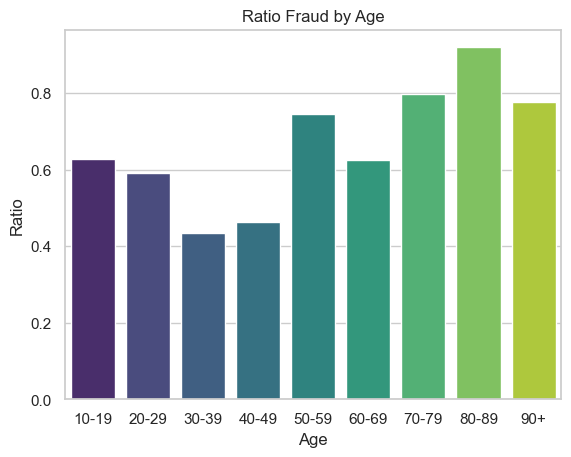

In [40]:
# Define age bins and labels
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90+']

# Create new age group column
df_cleaned['age_group'] = pd.cut(df_cleaned['age'], bins=bins, labels=labels, right=False)

# Group by age group and calculate ratio fraud
age_grouped = df_cleaned.groupby('age_group')['is_fraud'].mean().multiply(100).reset_index()

# Set bar plot
sns.set_style('whitegrid')
plt.Figure(figsize=(8, 6))
sns.barplot(
    x = 'age_group',
    y = 'is_fraud',
    data = age_grouped,
    palette= 'viridis'
)

plt.title('Ratio Fraud by Age')
plt.xlabel('Age')
plt.ylabel('Ratio')

plt.show()

### Distribution fraud by age

In [41]:
# Group age group by column is_fraud
summary_age_group = df_cleaned.groupby('age_group')['is_fraud'].value_counts().unstack(fill_value=0)

print(summary_age_group.sort_values(by=1, ascending=False))

is_fraud        0     1
age_group              
50-59      189888  1425
40-49      300155  1393
30-39      295368  1290
20-29      201743  1202
60-69      136029   856
70-79       74070   595
80-89       44059   409
90+         22483   176
10-19       25374   160


C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\3750012441.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_age_group = df_cleaned.groupby('age_group')['is_fraud'].value_counts().unstack(fill_value=0)


In [42]:
# Apply age_group to fraud_trx
fraud_trx['age_group'] = pd.cut(
    fraud_trx['age'],
    bins=bins,
    labels=labels,
    right=False
)

# Group fraud age group by amt
fraud_by_age_group = fraud_trx.groupby('age_group')['amt'].sum()

total_loss_amount_age_group = fraud_by_age_group.sum()

print(f"Total loss amount age group : ${total_loss_amount_age_group:,.2f}")
print("Loss amount by age group :")
for age_group, amt in fraud_by_age_group.items():
    print(f"{age_group} : ${amt:,.2f}")

Total loss amount age group : $3,988,088.61
Loss amount by age group :
10-19 : $97,902.74
20-29 : $631,492.09
30-39 : $650,532.75
40-49 : $646,964.81
50-59 : $800,084.84
60-69 : $496,806.69
70-79 : $350,564.55
80-89 : $215,593.30
90+ : $98,146.84


C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\3745936371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_trx['age_group'] = pd.cut(
C:\Users\DELL\AppData\Local\Temp\ipykernel_7592\3745936371.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_age_group = fraud_trx.groupby('age_group')['amt'].sum()


In [43]:
# Save file to CSV

df_cleaned.to_csv("Fraud.csv", index=False)